# BlightFight Phase 1: Establish Building List

In [254]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = None
from IPython.display import Image
from util import *

## Assign unique ID to every incident

In [152]:
permits = pd.read_table('../data/detroit-demolition-permits.tsv')

In [153]:
low, high = 0, len(permits)

In [154]:
permits['incident_id'] = range(low, high)

In [155]:
violations = pd.read_csv('../data/detroit-blight-violations.csv')

In [156]:
low += len(permits)
high += len(violations)

In [157]:
violations['incident_id'] = range(low, high)

In [158]:
crimes = pd.read_csv('../data/detroit-crime.csv')

In [159]:
low += len(violations)
high += len(crimes)

In [160]:
crimes['incident_id'] = range(low, high)

In [161]:
calls = pd.read_csv('../data/detroit-311.csv')

In [162]:
low += len(crimes)
high += len(calls)

In [163]:
calls['incident_id'] = range(low, high)

In [168]:
permits.to_csv('../data/permits.csv', index=False)
violations.to_csv('../data/violations.csv', index=False)
crimes.to_csv('../data/crimes.csv', index=False)
calls.to_csv('../data/calls.csv', index=False)

## Extract fields necessary for establish buildings

### Violations

In [169]:
violations = pd.read_csv('../data/violations.csv')

In [170]:
violations['ViolationAddress'].isnull().sum()

0

In [171]:
violations['ViolationAddressCoordinates'] = violations['ViolationAddress'].apply(lambda x: x.split('\n')[-1])
violations['ViolationAddressLatitude'] = violations['ViolationAddressCoordinates'].apply(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
violations['ViolationAddressLongitude'] = violations['ViolationAddressCoordinates'].apply(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

In [172]:
violations['ViolationAddressLatitude'].describe()

count    307804.000000
mean         42.384316
std           0.037249
min          42.255342
25%          42.353541
50%          42.387271
75%          42.415887
max          42.449453
Name: ViolationAddressLatitude, dtype: float64

In [173]:
violations['ViolationAddressLongitude'].describe()

count    307804.000000
mean        -83.108853
std           0.092597
min         -83.287664
25%         -83.187774
50%         -83.118802
75%         -83.047996
max         -82.910649
Name: ViolationAddressLongitude, dtype: float64

**Violations seem to contain no invalid coordinates.**

In [174]:
violations.head(1)

,TicketID,TicketNumber,AgencyName,ViolName,ViolationStreetNumber,ViolationStreetName,MailingStreetNumber,MailingStreetName,MailingCity,MailingState,MailingZipCode,NonUsAddressCode,Country,TicketIssuedDT,TicketIssuedTime,HearingDT,CourtTime,ViolationCode,ViolDescription,Disposition,FineAmt,AdminFee,LateFee,StateFee,CleanUpCost,JudgmentAmt,PaymentStatus,Void,ViolationCategory,ViolationAddress,MailingAddress,incident_id,ViolationAddressCoordinates,ViolationAddressLatitude,ViolationAddressLongitude
0,26288,05000001DAH,Department of Public Works,"Group, LLC, Grand Holding",2566,GRAND BLVD,743,"Beaubien, Ste. 201",Detroit,MI,48226,NaN,NaN,01/01/38440 12:00:00 AM,12:00:00,01/01/38474 12:00:00 AM,9:00AM,22-2-20,Burning solid waste in open fires,Responsible By Determination,$1500.00,$20.00,$150.00,$10.00,$0.00,$1680.00,PAID IN FULL,0,0,"2566 GRAND BLVD\r\nDetroit, MI\r\n(42.36318237...","743 Beaubien\r\nDetroit, MI 48226\r\n(42.33373...",7133,"(42.36318237000006, -83.09167672099994)",42.363182,-83.091677


In [175]:
violations['Address'] = violations['ViolationAddress'].apply(lambda x: x.split('\n')[0])

In [176]:
temp_violations = pd.DataFrame()

In [177]:
temp_violations['incident_id'] = violations['incident_id']
temp_violations['lat'] = violations['ViolationAddressLatitude']
temp_violations['lon'] = violations['ViolationAddressLongitude']
temp_violations['addr'] = violations['Address']

In [178]:
temp_violations.isnull().sum()

incident_id    0
lat            0
lon            0
addr           0
dtype: int64

### Permits

In [179]:
permits = pd.read_csv('../data/permits.csv')

In [180]:
permits.head(1)

,PERMIT_NO,PERMIT_APPLIED,PERMIT_ISSUED,PERMIT_EXPIRES,SITE_ADDRESS,BETWEEN1,PARCEL_NO,LOT_NUMBER,SUBDIVISION,CASE_TYPE,CASE_DESCRIPTION,LEGAL_USE,ESTIMATED_COST,PARCEL_SIZE,PARCEL_CLUSTER_SECTOR,STORIES,PARCEL_FLOOR_AREA,PARCEL_GROUND_AREA,PRC_AKA_ADDRESS,BLD_PERMIT_TYPE,PERMIT_DESCRIPTION,BLD_PERMIT_DESC,BLD_TYPE_USE,RESIDENTIAL,DESCRIPTION,BLD_TYPE_CONST_COD,BLD_ZONING_DIST,BLD_USE_GROUP,BLD_BASEMENT,FEE_TYPE,CSM_CASENO,CSF_CREATED_BY,SEQ_NO,PCF_AMT_PD,PCF_AMT_DUE,PCF_UPDATED,OWNER_LAST_NAME,OWNER_FIRST_NAME,OWNER_ADDRESS1,OWNER_ADDRESS2,OWNER_CITY,OWNER_STATE,OWNER_ZIP,CONTRACTOR_LAST_NAME,CONTRACTOR_FIRST_NAME,CONTRACTOR_ADDRESS1,CONTRACTOR_ADDRESS2,CONTRACTOR_CITY,CONTRACTOR_STATE,CONTRACTOR_ZIP,CONDITION_FOR_APPROVAL,site_location,owner_location,contractor_location,geom,incident_id
0,BLD2015-03955,8/28/15,8/28/15,NaN,4331 BARHAM,BETWEEN VOIGHT AND WAVENEY,21 65525-6,S15,NaN,BLD,Building Permit,I - FAM DWLG,NaN,5184,3,NaN,0,829,NaN,Dismantle,NaN,NaN,One Family Dwelling,RESIDENTIAL,NaN,5B,R2,R3,Y,WPMT,BLD2015-03955,RSA,1,NaN,$238.00,NaN,DETROIT LAND BANK-HHF2,NaN,65 CADILLAC,NaN,DETROIT,MI,NaN,DMC CONSULTANTS INC 2015 (W),NaN,13500 FOLEY,NaN,DETROIT,NaN,48227,NaN,"4331 BARHAM\r\nDetroit, MI\r\n(42.394106, -82....","65 CADILLAC\r\nDETROIT, MI\r\n(42.331741326000...","13500 FOLEY\r\nDETROIT, MI\r\n(42.379332, -83....",NaN,0


In [181]:
permits['site_location'].isnull().sum()

803

In [182]:
len(permits)

7133

In [183]:
permits.dropna(subset=['site_location'], inplace=True)

In [184]:
len(permits)

6330

In [185]:
permits.loc[:,'Coordinates'] = permits['site_location'].map(lambda x: x.split('\n')[-1])

In [186]:
permits.loc[:,'Coordinates'].replace('', np.nan, inplace=True)

In [187]:
permits.dropna(subset=['Coordinates'], inplace=True)

In [188]:
len(permits)

6316

**Permits have 803+14=817 NAs.**

In [189]:
permits['Latitude'] = permits['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
permits['Longitude'] = permits['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

In [190]:
permits['Latitude'].describe()

count    6316.000000
mean       42.382589
std         0.337459
min        42.262621
25%        42.342095
50%        42.379821
75%        42.414344
max        69.000000
Name: Latitude, dtype: float64

In [191]:
permits['Longitude'].describe()

count    6316.000000
mean      -83.064640
std         1.890730
min       -83.287653
25%       -83.146405
50%       -83.086728
75%       -83.009208
max        67.000000
Name: Longitude, dtype: float64

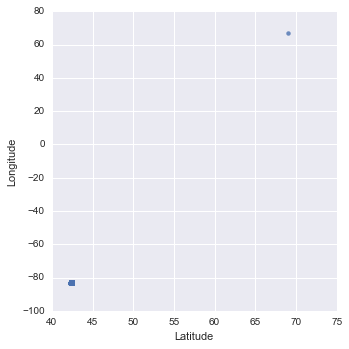

In [192]:
sns.lmplot('Latitude', 'Longitude', data=permits, fit_reg=False)

**Clearly there's an outlier.**

In [193]:
permits = permits[permits['Latitude'] < 45]

In [194]:
len(permits)

6315

In [195]:
temp_permits = pd.DataFrame()

In [196]:
temp_permits['incident_id'] = permits['incident_id']
temp_permits['lat'] = permits['Latitude']
temp_permits['lon'] = permits['Longitude']
temp_permits['addr'] = permits['SITE_ADDRESS']

In [197]:
temp_permits.isnull().sum()

incident_id    0
lat            0
lon            0
addr           0
dtype: int64

### Crimes

In [198]:
crimes = pd.read_csv('../data/crimes.csv')

In [199]:
crimes.head(1)

,ROWNUM,CASEID,INCINO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,NEIGHBORHOOD,CENSUSTRACT,ADDRESS,LON,LAT,LOCATION,incident_id
0,53256,1953933,1506030028.1,ASSAULT,ASSAULT AND BATTERY/SIMPLE ASSAULT,13001,06/03/2015 12:00:00 AM,2,1007,10,City Council District 5,PETOSKEY-OTSEGO,5334,09100 PETOSKEY,-83.1221,42.3678,"PETOSKEY\r\n09100\r\n(42.3676, -83.1219)",314937


In [200]:
crimes['LOCATION'].isnull().sum()

0

In [201]:
len(crimes)

119931

In [202]:
crimes['Coordinates'] = crimes['LOCATION'].map(lambda x: x.split('\n')[-1])

In [203]:
crimes['Coordinates'] = crimes['Coordinates'].replace('', np.nan)

In [204]:
crimes.dropna(subset=['Coordinates'], inplace=True)

In [205]:
len(crimes)

119901

**Crimes have 30 NAs.**

In [206]:
crimes['Latitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[0][1:].strip()).astype(np.float)
crimes['Longitude'] = crimes['Coordinates'].map(lambda x: x.split(',')[1][:-1].strip()).astype(np.float)

In [207]:
crimes['Latitude'].describe()

count    119901.000000
mean       2360.864859
std       48093.890028
min           8.999800
25%          42.357400
50%          42.392200
75%          42.422800
max      999999.000100
Name: Latitude, dtype: float64

In [208]:
crimes['Longitude'].describe()

count    119901.000000
mean       2235.661611
std       48099.925798
min        -121.246744
25%         -83.191200
50%         -83.116500
75%         -83.036400
max      999999.000100
Name: Longitude, dtype: float64

**A lot of outliers.**

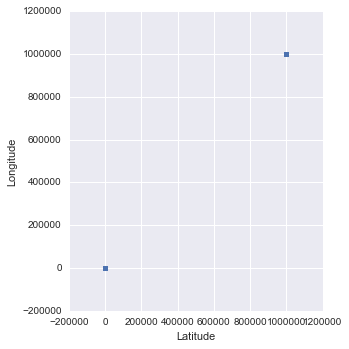

In [209]:
sns.lmplot('Latitude', 'Longitude', data=crimes, fit_reg=False)

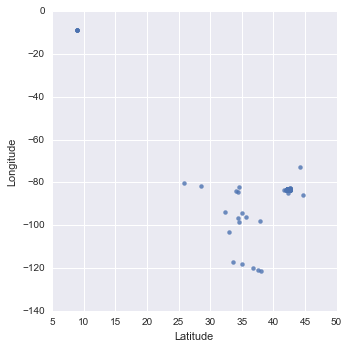

In [210]:
crimes = crimes[crimes['Latitude'] < 100]
sns.lmplot('Latitude', 'Longitude', data=crimes, fit_reg=False)

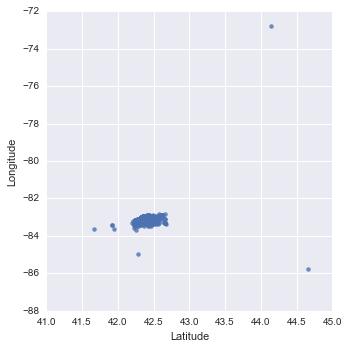

In [211]:
crimes = crimes[crimes['Latitude'] > 40]
sns.lmplot('Latitude', 'Longitude', data=crimes, fit_reg=False)

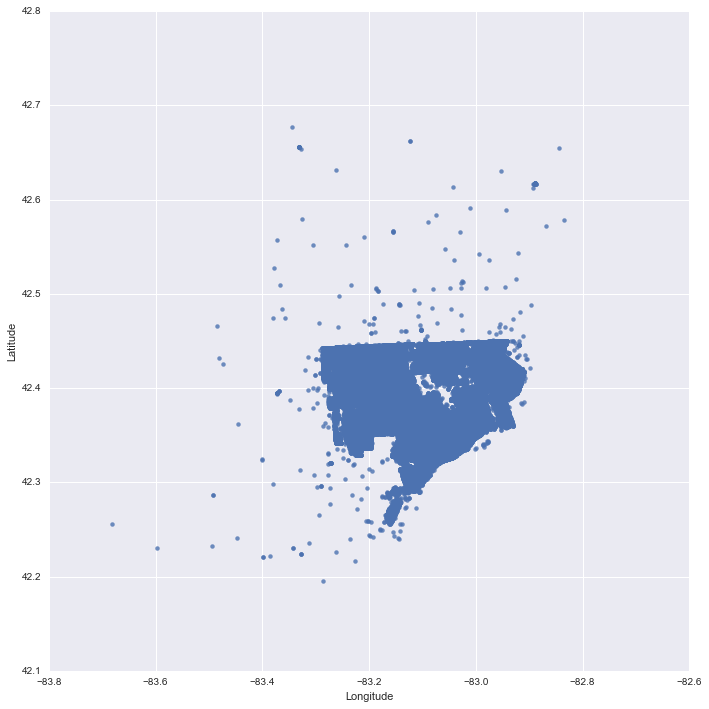

In [212]:
crimes = crimes[(crimes['Latitude'] > 42) & (crimes['Latitude'] < 43)]
crimes = crimes[(crimes['Longitude'] > -84) & (crimes['Longitude'] < -82)]
sns.lmplot('Longitude', 'Latitude', data=crimes, fit_reg=False, size=10)

**We can compare this with the actual geographical area of Detroit.**

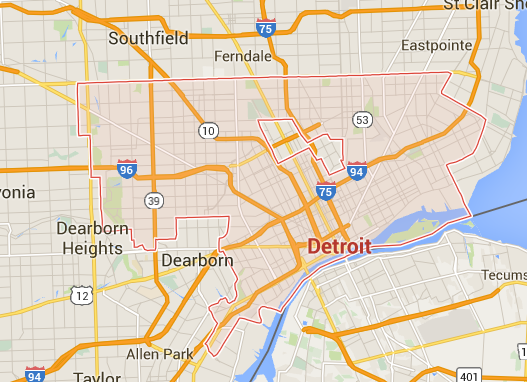

In [213]:
Image('detroit_area.png')

**Obviously there are still some points outside of Detroit. A compromised quick solution is to treat this area as a rectangle.**

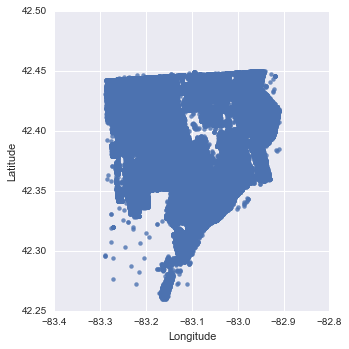

In [214]:
crimes = crimes[(crimes['Latitude'] >= 42.26) & (crimes['Latitude'] <= 42.45)]
crimes = crimes[(crimes['Longitude'] >= -83.29) & (crimes['Longitude'] <= -82.91)]
sns.lmplot('Longitude', 'Latitude', data=crimes, fit_reg=False)

In [215]:
len(crimes)

119302

**599 outliers.**

In [216]:
temp_crimes = pd.DataFrame()

In [217]:
temp_crimes['incident_id'] = crimes['incident_id']
temp_crimes['lat'] = crimes['Latitude']
temp_crimes['lon'] = crimes['Longitude']
temp_crimes['addr'] = crimes['ADDRESS']

### 311 Calls

In [218]:
calls = pd.read_csv('../data/calls.csv')

In [219]:
calls.head(1)

,ticket_id,city,issue_type,ticket_status,issue_description,rating,ticket_closed_date_time,acknowledged_at,ticket_created_date_time,ticket_last_updated_date_time,address,lat,lng,location,image,incident_id
0,1516722,City of Detroit,Clogged Drain,Acknowledged,"Two drains one on each side of street, street ...",3,NaN,03/06/2015 10:03:38 PM,03/06/2015 09:57:52 PM,04/12/2015 01:01:10 AM,"13120-13130 Ilene Street Detroit, MI 48238, USA",42.383998,-83.161039,"(42.3839977668, -83.1610385642)",NaN,434868


In [220]:
calls['address'][:10]

0    13120-13130 Ilene Street Detroit, MI 48238, USA
1              1485 E. Outer Drive Detroit, Michigan
2                   15460 Eastburn Detroit, Michigan
3                 17541 Mendota St Detroit, Michigan
4                           Griggs Detroit, Michigan
5                   14902 Kentucky Detroit, Michigan
6                    20089 Vaughan Detroit, Michigan
7                 18663 Fenelon St Detroit, Michigan
8                   16170 Ilene St Detroit, Michigan
9                19530 Roselawn St Detroit, Michigan
Name: address, dtype: object

In [221]:
len(calls)

19681

In [225]:
calls['address'] = calls['address'].replace('', np.nan)

In [226]:
calls.dropna(subset=['address'], inplace=True)

In [227]:
def truncate_addr(x):
    p = x.lower().find('detroit')
    if p != -1:
        x = x[:p]
    p = x.lower().find('michigan')
    if p != -1:
        x = x[:p]
    return x.rstrip()

In [228]:
calls['address_trucated'] = calls['address'].map(truncate_addr)

In [229]:
calls['lat'].describe()

count    19679.000000
mean        42.386308
std          0.038309
min         41.879952
25%         42.355576
50%         42.387895
75%         42.419724
max         42.449849
Name: lat, dtype: float64

In [230]:
calls['lng'].describe()

count    19679.000000
mean       -83.109306
std          0.100189
min        -86.550059
25%        -83.191723
50%        -83.112390
75%        -83.037698
max        -82.911434
Name: lng, dtype: float64

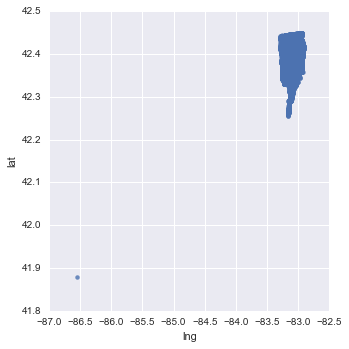

In [231]:
sns.lmplot('lng', 'lat', data=calls, fit_reg=False)

**1 outlier.**

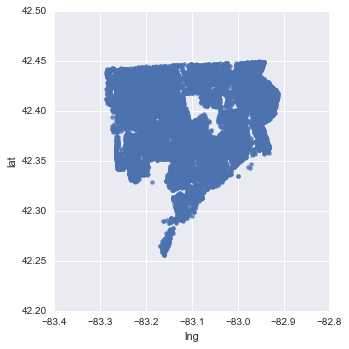

In [232]:
calls = calls[calls['lat'] > 42.2]
sns.lmplot('lng', 'lat', data=calls, fit_reg=False)

In [233]:
temp_calls = pd.DataFrame()

In [234]:
temp_calls['incident_id'] = calls['incident_id']
temp_calls['lat'] = calls['lat']
temp_calls['lon'] = calls['lng']
temp_calls['addr'] = calls['address_trucated']

### Join

In [235]:
raw_incidents = pd.concat((temp_permits, temp_violations), axis=0, ignore_index=True)
raw_incidents = pd.concat((raw_incidents, temp_crimes), axis=0, ignore_index=True)
raw_incidents = pd.concat((raw_incidents, temp_calls), axis=0, ignore_index=True)

**incident_id here uniquely identifies an incident!!!**

In [237]:
raw_incidents['incident_id'].describe()

count    453099.000000
mean     227476.024644
std      130950.564844
min           0.000000
25%      114092.500000
50%      227367.000000
75%      340776.500000
max      454547.000000
Name: incident_id, dtype: float64

In [238]:
raw_incidents.head(10)

,incident_id,lat,lon,addr
0,0,42.394106,-82.947400,4331 BARHAM
1,1,42.395122,-83.005077,9707 BESSEMORE
2,2,42.403220,-82.946476,5315 BERKSHIRE
3,3,42.446640,-82.947207,16670 BRINGARD DR
4,4,42.276956,-83.147536,1454 BEATRICE
5,5,42.400373,-82.947050,5035 BALFOUR
6,6,42.402349,-82.948348,5297 BALFOUR
7,7,42.402497,-82.948445,5315 BALFOUR
8,8,42.402275,-82.948299,5280 BALFOUR
9,9,42.366963,-82.935172,427 ASHLAND


In [239]:
raw_incidents.sort_values(by=['lat', 'lon'], inplace=True)

In [240]:
raw_incidents['addr'].replace('', np.nan, inplace=True)
raw_incidents.dropna(subset=['addr'], inplace=True)

In [241]:
raw_incidents.head(3)

,incident_id,lat,lon,addr
52635,53453,42.255342,-83.160990,26585 OUTER DRIVE\r
444578,446027,42.255736,-83.160580,26585 West Outer Drive
445191,446640,42.256102,-83.160697,3808 S Bassett St


In [242]:
raw_incidents.to_csv('../data/raw_incidents.csv', index=False)

## Clean up the address field

In [243]:
incidents = pd.read_csv('../data/raw_incidents.csv')

In [244]:
incidents.head(3)

,incident_id,lat,lon,addr
0,53453,42.255342,-83.160990,26585 OUTER DRIVE
1,446027,42.255736,-83.160580,26585 West Outer Drive
2,446640,42.256102,-83.160697,3808 S Bassett St


In [245]:
len(incidents)

453052

In [246]:
import string
import re

def clean_addr(s):
    s = s.lower()
    s = s.translate(string.maketrans('', ''), string.punctuation)
    s = re.sub(r'\bstreet\b', r'st', s)
    s = re.sub(r'\broad\b', r'rd', s)
    s = re.sub(r'\bavenue\b', r'av', s)
    s = re.sub(r'\bdrive\b', r'dr', s)
    s = re.sub(r'\bboulevard\b', r'bd', s)
    s = re.sub(r'\bblvd\b', r'bd', s)
    s = re.sub(r'\bnorth\b', r'n', s)
    s = re.sub(r'\bsouth\b', r's', s)
    s = re.sub(r'\bwest\b', r'w', s)
    s = re.sub(r'\beast\b', r'e', s)
    s = re.sub(r' +', r' ', s)
    p = s.find('detroit mi')
    if p != -1:
        s = s[:p]
    p = s.find('detroitmi')
    if p != -1:
        s = s[:p]        
    s = s.strip()
    return s

In [247]:
incidents['clean_addr'] = incidents['addr'].map(clean_addr)

In [248]:
incidents.head(10)

,incident_id,lat,lon,addr,clean_addr
0,53453,42.255342,-83.160990,26585 OUTER DRIVE,26585 outer dr
1,446027,42.255736,-83.160580,26585 West Outer Drive,26585 w outer dr
2,446640,42.256102,-83.160697,3808 S Bassett St,3808 s bassett st
3,446574,42.256356,-83.160224,3795 S. Bassett,3795 s bassett
4,437572,42.256990,-83.159955,3744 South Bassett,3744 s bassett
5,445733,42.256990,-83.159955,3744 S Bassett,3744 s bassett
6,98489,42.257824,-83.163374,26367 OUTER DRIVE,26367 outer dr
7,452621,42.258149,-83.161980,3738 Deacon,3738 deacon
8,263309,42.258214,-83.163964,26331 OUTER DRIVE,26331 outer dr
9,263310,42.258214,-83.163964,26331 OUTER DRIVE,26331 outer dr


## Clustering with exact address matching

In [249]:
def get_clusters(df):
    count = 0
    table = {}
    cluster = []
    for addr in df.loc[:,'clean_addr']:
        if table.has_key(addr):
            cluster.append(table[addr])
        else:
            count += 1
            table[addr] = count
            cluster.append(count)
    df['cluster'] = np.array(cluster)
    return df, count

In [250]:
incidents, num_clusters = get_clusters(incidents)
num_clusters

179544

In [251]:
incidents.sort_values(by=['clean_addr'], ascending=True, inplace=True)

In [252]:
incidents[incidents['clean_addr'].str.contains('detroit')]

,incident_id,lat,lon,addr,clean_addr,cluster
113108,331405,42.354700,-83.028800,00 ANTIETAM REST 1428 GRATIOT DETROIT 48207,00 antietam rest 1428 gratiot detroit 48207,45395
88560,380683,42.346400,-83.060000,00 CASS TECH HIGH 2501 2ND DETROIT 48201,00 cass tech high 2501 2nd detroit 48201,35462
26203,347567,42.331400,-83.044300,00 CIGAR BAR 140 CADILLIAC SQ DETROIT,00 cigar bar 140 cadilliac sq detroit,11613
25942,410988,42.331300,-83.044200,00 CIGAR BAR 140 CADILLIAC SQ DETROIT,00 cigar bar 140 cadilliac sq detroit,11613
61717,341057,42.335700,-83.049100,00 CLUB BLUE 1540 WOODWARD AVE DETROIT,00 club blue 1540 woodward ave detroit,24590
121845,348212,42.357700,-83.211400,00 CLUB INNUENDO 744 E SAVANNAH DETROIT 48228,00 club innuendo 744 e savannah detroit 48228,48891
20627,318075,42.328900,-83.111700,00 DETROIT,00 detroit,9348
271501,424475,42.400700,-82.926200,00 DETROIT,00 detroit,9348
271820,424874,42.400800,-82.926300,00 DETROIT,00 detroit,9348
337775,410160,42.417000,-83.138500,00 DETROIT,00 detroit,9348


In [253]:
incidents = incidents[incidents['clean_addr'] != '00 detroit']

## Clustering with fuzzy address matching

In [255]:
def is_same_addr(x, y):
    xt = x.split()
    yt = y.split()
    xs = set(xt)
    ys = set(yt)
    
    # if start with road number, it has to match
    flag_start_with_number = xt[0].isdigit() and yt[0].isdigit()
    flag_number_match = (xt[0] == yt[0])
    
    num_tokens_match = len(xs.intersection(ys))
    
    # this accounts for typos
    flag_edit_dist_ok = (edit_distance(x, y, sub_cost=2) < 7)
    
    if flag_start_with_number:
        if flag_number_match and num_tokens_match >= 1 and flag_edit_dist_ok:
            return True
    else:
        if num_tokens_match >= 1 and flag_edit_dist_ok:
            return True
    
    return False

In [256]:
is_same_addr('26585 outer drive', '26585 w outer drive')

True

In [257]:
is_same_addr('3808 seneca', '3808 15th')

False

In [258]:
is_same_addr('13900 gallager', '13900 gallagher')

True

In [259]:
is_same_addr('15710 snowden', '15710 snowden st')

True

In [263]:
def refine_clusters(df):
    clusters = {}
    
    row0 = df.iloc[0, :]
    prev_cluster = row0['cluster']
    prev_addr = row0['clean_addr']
    row0_id =row0['incident_id']
    clusters[row0_id] = prev_cluster

    for index, row in df.iterrows():
        addr = row['clean_addr']
        cluster = row['cluster']
        id = row['incident_id']
        
        if id == row0_id:
            continue
        
        if cluster != prev_cluster:
            if is_same_addr(addr, prev_addr):
                cluster = prev_cluster
            else:
                prev_cluster = cluster
                prev_addr = addr
        
        clusters[id] = cluster
    
    df['refined_cluster'] = df['incident_id'].map(lambda x: clusters[x])
    return df

In [261]:
len(incidents['cluster'].unique())

179543

In [264]:
incidents = refine_clusters(incidents)

In [265]:
len(incidents['refined_cluster'].unique())

159478

In [266]:
incidents.sort_values(by=['lat', 'lon'], inplace=True)

In [267]:
unique_clusters = incidents['refined_cluster'].unique()

In [268]:
cluster_remap = dict(zip(unique_clusters, range(len(unique_clusters))))

In [269]:
incidents['remapped_cluster'] = incidents['refined_cluster'].map(lambda x: cluster_remap[x])

In [270]:
incidents.head(20)

,incident_id,lat,lon,addr,clean_addr,cluster,refined_cluster,remapped_cluster
0,53453,42.255342,-83.160990,26585 OUTER DRIVE,26585 outer dr,1,1,0
1,446027,42.255736,-83.160580,26585 West Outer Drive,26585 w outer dr,2,1,0
2,446640,42.256102,-83.160697,3808 S Bassett St,3808 s bassett st,3,3,1
3,446574,42.256356,-83.160224,3795 S. Bassett,3795 s bassett,4,4,2
5,445733,42.256990,-83.159955,3744 S Bassett,3744 s bassett,5,5,3
4,437572,42.256990,-83.159955,3744 South Bassett,3744 s bassett,5,5,3
6,98489,42.257824,-83.163374,26367 OUTER DRIVE,26367 outer dr,6,6,4
7,452621,42.258149,-83.161980,3738 Deacon,3738 deacon,7,92253,5
8,263309,42.258214,-83.163964,26331 OUTER DRIVE,26331 outer dr,8,8,6
9,263310,42.258214,-83.163964,26331 OUTER DRIVE,26331 outer dr,8,8,6


In [271]:
incidents.to_csv('../data/incidents.csv', index=False)

In [599]:
# incidents.sort_values(by=['clean_addr']).to_csv('../data/inspect_incidents.csv', index=False)

## Establish buildings

In [272]:
import geopy

In [273]:
from geopy.distance import vincenty

In [274]:
eps = 0.000075

In [275]:
a = (42.255342,-83.160990)
b = (a[0]+eps, a[1]+eps)
vincenty(a, b).meters

10.378130320319412

In [276]:
def get_buildings(df):
    buildings = []
    
    row0 = df.iloc[0, :]
    row0_id =row0['incident_id']
    
    lat = row0['lat']
    lon = row0['lon']
    
    current_cluster = row0['remapped_cluster']
    current_addr = row0['addr']
    bottom_left = [lat, lon]
    top_right = [lat, lon]
    incident_ids = [row0_id]
    num = 1

    for index, row in df.iterrows():
        id = row['incident_id']
        cluster = row['remapped_cluster']
        addr = row['addr']
        lat = row['lat']
        lon = row['lon']
        
        if id == row0_id:
            continue
        
        if cluster == current_cluster:
            num += 1
            incident_ids.append(id)
            if lat < bottom_left[0] and lon < bottom_left[1]:
                bottom_left = [lat, lon]
            if lat > top_right[0] and lat > top_right[1]:
                top_right = [lat, lon]
            
        else:
            bottom_left[0] -= eps
            bottom_left[1] -= eps
            top_right[0] += eps
            top_right[1] += eps
            this = [bottom_left, top_right, current_addr, current_cluster, num, incident_ids]
            buildings.append(this)
            
            current_cluster = cluster
            current_addr = addr
            bottom_left = [lat, lon]
            top_right = [lat, lon]
            incident_ids = [id]
            num = 1
            
    df_buildings= pd.DataFrame(buildings)
    df_buildings.columns = ['bottom_left', 'top_right', 'addr', 'cluster', 'num', 'incident_ids']
    df_buildings['building_id'] = range(len(buildings))
    
    return df_buildings

In [277]:
incidents.sort_values(by=['remapped_cluster'], inplace=True)

In [278]:
incidents.head(10)

,incident_id,lat,lon,addr,clean_addr,cluster,refined_cluster,remapped_cluster
0,53453,42.255342,-83.160990,26585 OUTER DRIVE,26585 outer dr,1,1,0
1,446027,42.255736,-83.160580,26585 West Outer Drive,26585 w outer dr,2,1,0
2,446640,42.256102,-83.160697,3808 S Bassett St,3808 s bassett st,3,3,1
3,446574,42.256356,-83.160224,3795 S. Bassett,3795 s bassett,4,4,2
5,445733,42.256990,-83.159955,3744 S Bassett,3744 s bassett,5,5,3
4,437572,42.256990,-83.159955,3744 South Bassett,3744 s bassett,5,5,3
6,98489,42.257824,-83.163374,26367 OUTER DRIVE,26367 outer dr,6,6,4
231442,184340,42.389446,-83.131770,3738 DAVISON,3738 davison,92253,92253,5
231443,184341,42.389446,-83.131770,3738 DAVISON,3738 davison,92253,92253,5
231441,143897,42.389446,-83.131770,3738 DAVISON,3738 davison,92253,92253,5


In [279]:
buildings = get_buildings(incidents)

In [280]:
buildings.head(10)

,bottom_left,top_right,addr,cluster,num,incident_ids,building_id
0,"[42.255267051, -83.161064994]","[42.255811, -83.160505]",26585 OUTER DRIVE,0,2,"[53453.0, 446027.0]",0
1,"[42.256027, -83.1607722]","[42.256177, -83.1606222]",3808 S Bassett St,1,1,[446640.0],1
2,"[42.2562812, -83.160299]","[42.2564312, -83.160149]",3795 S. Bassett,2,1,[446574.0],2
3,"[42.2569146, -83.1600297]","[42.2570646, -83.1598797]",3744 S Bassett,3,2,"[445733.0, 437572.0]",3
4,"[42.257749066, -83.163449065]","[42.257899066, -83.163299065]",26367 OUTER DRIVE,4,1,[98489.0],4
5,"[42.258074, -83.162055]","[42.389520761, -83.131695432]",3738 DAVISON,5,4,"[184340.0, 184341.0, 143897.0, 452621.0]",5
6,"[42.258138537, -83.164039033]","[42.258288537, -83.163889033]",26331 OUTER DRIVE,6,2,"[263310.0, 263309.0]",6
7,"[42.2585290098, -83.163077]","[42.2586790098, -83.162927]",3742 S Beatrice St,7,1,[452362.0],7
8,"[42.258624, -83.163601]","[42.258774, -83.163451]",3751 Annabelle,8,1,[452735.0],8
9,"[42.259207854, -83.165646466]","[42.259357854, -83.165496466]",26211 OUTER DRIVE,9,3,"[63847.0, 45469.0, 63848.0]",9


In [281]:
len(buildings)

159477

In [282]:
buildings.to_csv('../data/buildings.csv', index=False)